In [ ]:
#importing all necessary 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
RANDOM_STATE = 8
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#Importing and Splitting the dataset
dataset = pd.read_csv('clinics.csv')
df = dataset.iloc[ : , :]
print(df.head())
X, y = dataset.iloc[:, 1:-1], dataset.iloc[:, -1]
print(X)
print(y)

        Patient ID  Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
0  126e9dd13932f68                    17    0.236515   -0.022340  -0.517413   
1  8bb9d64f0215244                     1   -1.571682   -0.774212   1.429667   
2  6c9d3323975b082                     9   -0.747693   -0.586244  -0.429480   
3  d3ea751f3db9de9                    11    0.991838    0.792188   0.072992   
4  2c2eae16c12a18a                     9    0.190738   -0.147652  -0.668155   

   Red blood Cells  Lymphocytes  Leukocytes  Basophils  Eosinophils  ...  \
0         0.102004     0.318366   -0.094610  -0.223767     1.482158  ...   
1        -0.850035    -0.005738    0.364550  -0.223767     1.018625  ...   
2        -1.361315    -1.114514   -0.884923   0.081693    -0.666950  ...   
3         0.542763     0.045436   -0.211488  -0.834685    -0.709090  ...   
4        -0.127191     0.002791   -1.132592   0.387152    -0.709090  ...   

   Serum Glucose  Neutrophils      Urea  Proteina C reativa mg/dL  C

[0.0565957  0.04637118 0.04448934 0.08563202 0.05078975 0.04486242
 0.1344088  0.03771417 0.06895267 0.06635857 0.02853604 0.04094511
 0.03948349 0.05678429 0.03963728 0.03935778 0.03755375 0.04205743
 0.03947021]


<BarContainer object of 19 artists>

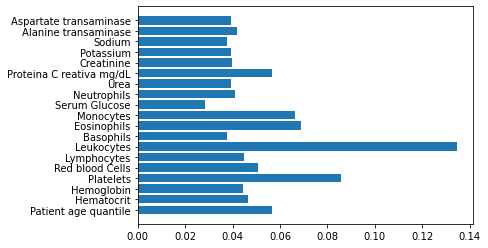

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
index=["Patient age quantile","Hematocrit","Hemoglobin","Platelets","Red blood Cells","Lymphocytes","Leukocytes","Basophils","Eosinophils","Monocytes","Serum Glucose","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Potassium","Sodium","Alanine transaminase","Aspartate transaminase"]
model = ExtraTreesClassifier()
model.fit(X,y)
test = SelectKBest(score_func=f_classif, k=4)
model.fit(X, y)
print(model.feature_importances_) ## use inbuilt class feature_importances of tree based classifiers
## plot graph of feature importances for better visualization
plt.barh(index,model.feature_importances_)

[0.05709004 0.04508531 0.04399648 0.09658715 0.04937523 0.04424171
 0.13449591 0.04243367 0.07071181 0.06625987 0.02744907 0.04166048
 0.03719536 0.05527886 0.04172672 0.03772999 0.03507502 0.03360585
 0.04000147]


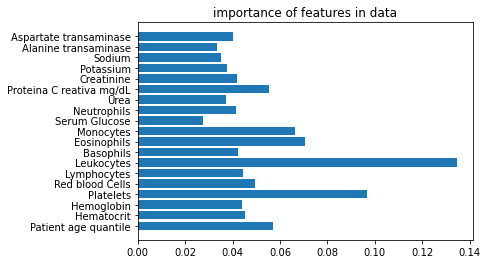

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
index=["Patient age quantile","Hematocrit","Hemoglobin","Platelets","Red blood Cells","Lymphocytes","Leukocytes","Basophils","Eosinophils","Monocytes","Serum Glucose","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Potassium","Sodium","Alanine transaminase","Aspartate transaminase"]
model = ExtraTreesClassifier(criterion="entropy")
model.fit(X,y)
print(model.feature_importances_) ## use inbuilt class feature_importances of tree based classifiers
## plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index={"Patient age quantile","Hematocrit","Hemoglobin","Platelets","Red blood Cells","Lymphocytes","Leukocytes","Basophils","Eosinophils","Monocytes","Serum Glucose","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Potassium","Sodium","Alanine transaminase","Aspartate transaminase"})
#feat_importances.nlargest(19).plot(kind='barh')
plt.barh(index,model.feature_importances_)
plt.title("importance of features in data")
plt.show()

[0.11908414029451944, 0.08675485440934941, 0.0899211775203541, -0.262811414829576, 0.09684155125082812, -0.012439055388081731, -0.30146874657349615, -0.0499897747103393, -0.20022679558423667, 0.15483139964959972, -0.00021508991246113216, -0.0161787641941323, -0.059884714422301324, 0.11427372687102776, 0.07167669876923717, -0.052410653197148306, -0.05502912746204852, 0.013525520866464826, 0.03149986009519151]
[0.0005168947643487174, 0.00960354796761463, 0.0076234734297415735, 3.994409478548762e-15, 0.003821593346342465, 0.7098652931560526, 1.7952026511250067e-19, 0.15567223380380188, 3.6502332436408968e-09, 3.99119541881897e-06, 0.9954297095860951, 0.6315573144999647, 0.08780253354571169, 0.0007733443352705429, 0.038460869374799256, 0.1417171299808979, 0.126298219906677, 0.7172786325642093, 0.39930653322705145]


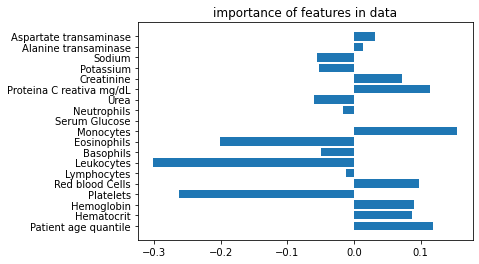

In [ ]:
from scipy import stats
tau_values = []
p_values = []
col = ["Patient age quantile","Hematocrit","Hemoglobin","Platelets","Red blood Cells","Lymphocytes","Leukocytes","Basophils","Eosinophils","Monocytes","Serum Glucose","Neutrophils","Urea","Proteina C reativa mg/dL","Creatinine","Potassium","Sodium","Alanine transaminase","Aspartate transaminase"]
for i in col:
  tau,p_val = stats.kendalltau(X[i] , y)
  tau_values.append(tau)
  p_values.append(p_val)

print(tau_values)
print(p_values)
plt.barh(col,tau_values)
plt.title("importance of features in data")
plt.show()


In [ ]:
def get_train_test(dataset, mask_col=None):
        
    # splitting into train and test dataset

    X, y = dataset.iloc[:, 1:-1], dataset.iloc[:, -1]

    #X, y = make_classification(n_samples=100, n_features=15, n_classes=3,
     #                           n_informative=4, n_redundant=1, n_repeated=2,
      #                          random_state=1)

    X, y = pd.DataFrame(X), pd.Series(y).values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    if mask_col:
        X_train, X_test = X_train[mask_col], X_test[mask_col]
    print("Train Feature: {0}\nTest Feature: {1}\nTrain Target: {2}\nTest Target: {3}\n".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    
    # bringing all of the features into a similar scale

    scaler = preprocessing.StandardScaler()
    scaler.fit_transform(X_train)
    scaler.transform(X_test)

    print(X_test.head())
    
    # imputing missing or invalid values

    my_imputer = SimpleImputer()
    X_train = my_imputer.fit_transform(X_train)
    X_test = my_imputer.transform(X_test)
    print(X_train)
    return X_train, X_test, y_train, y_test, X, y

In [ ]:
#imputed function
X_train, X_test, y_train, y_test, X, y = get_train_test(df)

Train Feature: (480, 19)
Test Feature: (120, 19)
Train Target: (480,)
Test Target: (120,)

     Patient age quantile  Hematocrit  Hemoglobin  Platelets  Red blood Cells  \
521                     0   -1.182576   -0.836868  -0.153121         0.049113   
107                    19   -0.862136   -0.774212  -2.276066        -1.061599   
50                     18    1.106281    1.168124  -0.781211         0.313568   
371                    18    0.556955    0.729532  -0.291300         0.207786   
194                     3    1.014726    1.042812  -1.208313         1.001153   

     Lymphocytes  Leukocytes  Basophils  Eosinophils  Monocytes  \
521    -1.438617    1.783774  -1.140144    -0.414114  -1.008140   
107     0.096611   -1.828290   1.914447    -0.835508   1.092916   
50      0.173372   -0.717956   0.998070     0.344395   3.246500   
371    -0.850113    0.269936  -0.529226    -0.371974   0.541389   
194    -0.526010   -1.302342  -0.223767    -0.456253   0.515126   

     Serum Glucose 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
#Anova
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 7.503961
Feature 1: 5.380487
Feature 2: 5.933514
Feature 3: 34.895691
Feature 4: 8.484920
Feature 5: 1.201293
Feature 6: 37.130845
Feature 7: 1.719682
Feature 8: 20.134082
Feature 9: 13.195477
Feature 10: 0.256310
Feature 11: 0.008133
Feature 12: 1.620984
Feature 13: 2.179785
Feature 14: 1.251748
Feature 15: 1.944513
Feature 16: 1.946431
Feature 17: 4.727076
Feature 18: 8.194520


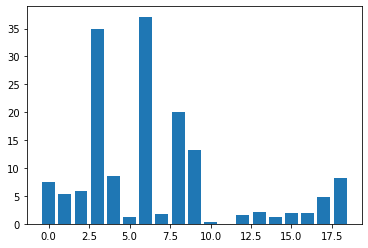

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()